In [1]:
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
import mplfinance as mpf

from Trader import Trader
from DivergenceDetector import DivergenceDetector

In [2]:
data_paths = [
    'data/2022/january/ethusdt.4hour.1january2022-1february2022.csv',
    'data/2022/february/ethusdt.4hour.1-28feb2022.csv',
    'data/2022/march/ethusdt.4hour.1march2022-21march2022.csv'
]

df = pd.concat([pd.read_csv(d, index_col='Open time', usecols=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume']) for d in data_paths])
df = df.drop_duplicates(keep='first')
df = df.dropna()

df.index = pd.to_datetime(df.index)
df = df.sort_values('Open time')

In [3]:
trader = Trader()

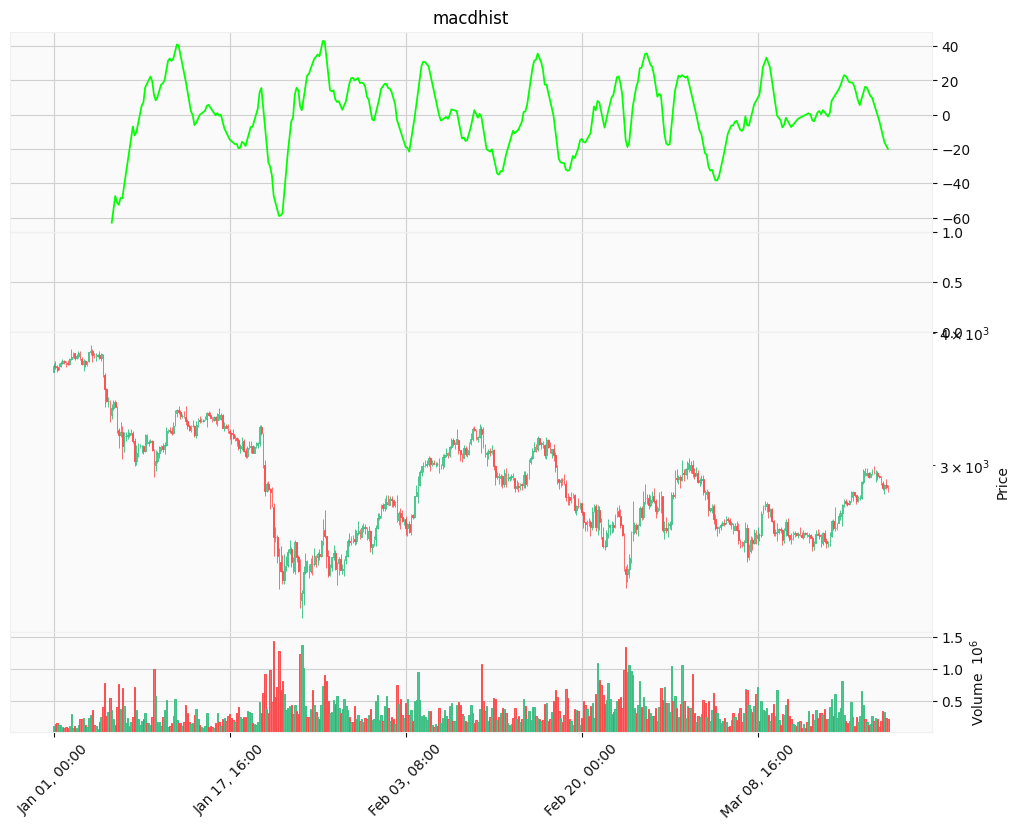

In [4]:
_, _, macdhist = talib.MACD(df.Close)

ap0 = [
    mpf.make_addplot(macdhist, color='#00FF00', panel=0, title='macdhist'),
]

mpf.plot(
        df,
        panel_ratios=(2, 1, 3, 1),
        type="hollow_candle",
        yscale='log',
        volume=True,
        style='yahoo',
        figsize=(12.8, 10),
        addplot=ap0,
        main_panel=2,
        volume_panel=3,
        num_panels=4,
    )


In [5]:
diverge_detector = DivergenceDetector()

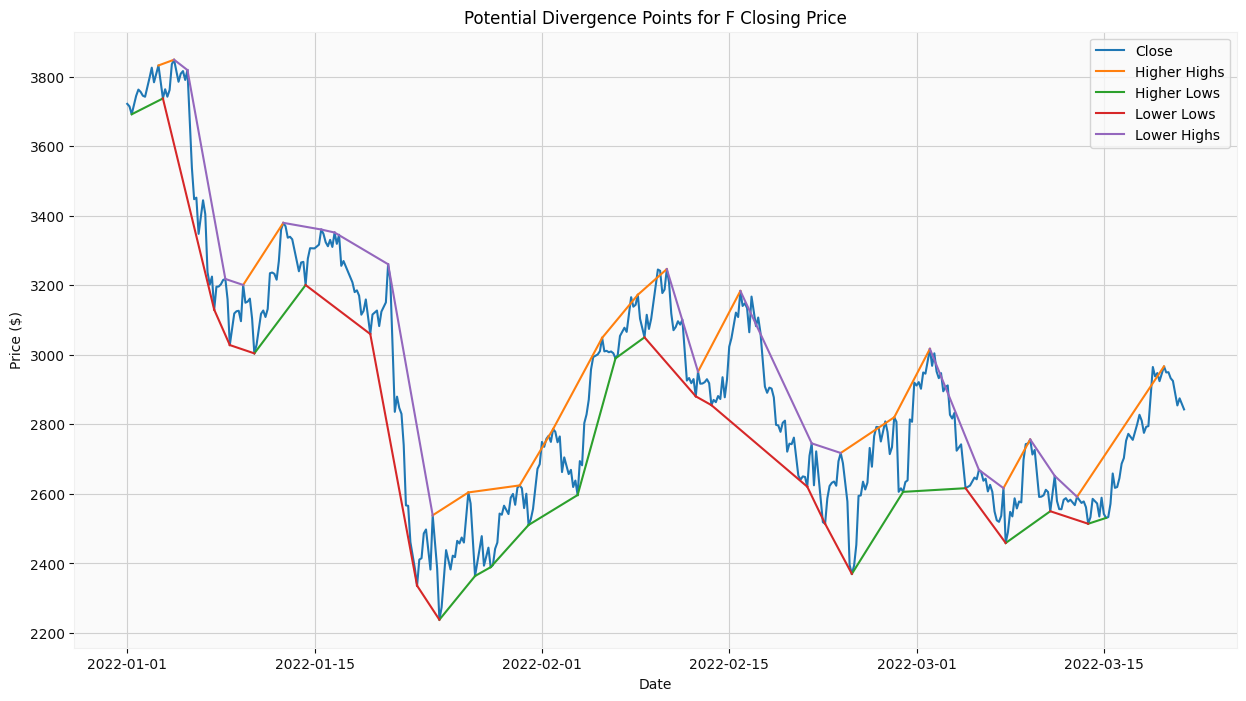

In [6]:
diverge_detector.plot(df)